## Importing Modules

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input

## Define the TRAIN_PATH

In [14]:
TRAIN_PATH = 'data/Original/'

In [15]:
SIZE = 96
IMG_CHANNELS = 3

In [16]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split = 0.20 
  )

In [17]:
train_iterator = train_datagen.flow_from_directory(TRAIN_PATH, target_size = (SIZE,SIZE),batch_size = 32,
                                        subset = 'training', class_mode = 'categorical') 

Found 8000 images belonging to 2 classes.


In [18]:
validation_iterator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                 target_size = (SIZE,SIZE),
                                                 batch_size = 32,
                                                 subset='validation',
                                                 class_mode = 'categorical') 

Found 2000 images belonging to 2 classes.


## ResNet50

In [19]:
def create_model_1(input_shape, n_classes):
   
  
    base_model = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False) 


  
    for layer in base_model.layers:
        layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    output = tf.keras.layers.Dense(n_classes, activation="softmax")(x)



    model = Model(inputs=base_model.input, outputs=output) 

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

    return model

In [20]:
model = create_model_1((SIZE,SIZE,IMG_CHANNELS), 2)

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 102, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 48, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [22]:
history = model.fit(train_iterator, epochs=10, validation_data=validation_iterator, 
                                   steps_per_epoch=len(train_iterator), validation_steps=len(validation_iterator), batch_size = 32
                                   )

Epoch 1/10
250/250 [==============================] - 137s 541ms/step - loss: 0.6065 - accuracy: 0.6780 - val_loss: 0.6897 - val_accuracy: 0.5380
Epoch 2/10
250/250 [==============================] - 16s 65ms/step - loss: 0.5884 - accuracy: 0.6986 - val_loss: 0.5880 - val_accuracy: 0.6945
Epoch 3/10
250/250 [==============================] - 18s 71ms/step - loss: 0.5803 - accuracy: 0.7063 - val_loss: 0.5717 - val_accuracy: 0.7125
Epoch 4/10
250/250 [==============================] - 17s 69ms/step - loss: 0.5765 - accuracy: 0.7010 - val_loss: 0.5724 - val_accuracy: 0.7085
Epoch 5/10
250/250 [==============================] - 17s 66ms/step - loss: 0.5645 - accuracy: 0.7126 - val_loss: 0.5565 - val_accuracy: 0.7160
Epoch 6/10
250/250 [==============================] - 18s 70ms/step - loss: 0.5751 - accuracy: 0.7021 - val_loss: 0.5665 - val_accuracy: 0.7125
Epoch 7/10
250/250 [==============================] - 17s 68ms/step - loss: 0.5728 - accuracy: 0.7095 - val_loss: 0.5527 - val_accurac

In [ ]:
plt.plot(history.history['accuracy'],'--')
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title("Training vs Validation accuracy (10 epochs)")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig('resnet_accuracy.png')

In [ ]:
plt.plot(history.history['loss'],'--')
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')
plt.title("Training vs Validation Loss (10 epochs)")
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.savefig('resnet_loss.png')

## Xception

In [23]:
from keras.applications import Xception
from keras.applications.xception import preprocess_input

In [24]:
def create_model_2(input_shape, n_classes):
   
  
    base_model = Xception(input_shape=input_shape, weights='imagenet', include_top=False) 


  
    for layer in base_model.layers:
        layer.trainable = False

    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    output = tf.keras.layers.Dense(n_classes, activation="softmax")(x)



    model_2 = Model(inputs=base_model.input, outputs=output) 

    model_2.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

    return model_2

In [25]:
model_2 = create_model_2((SIZE,SIZE,IMG_CHANNELS), 2)

In [26]:
model_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 47, 47, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 47, 47, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 47, 47, 32)   0           ['block1_conv1_bn[0][0]']  

In [27]:
history_2 = model_2.fit(train_iterator, epochs=10, validation_data=validation_iterator, 
                                   steps_per_epoch=len(train_iterator), validation_steps=len(validation_iterator))

Epoch 1/10
250/250 [==============================] - 20s 71ms/step - loss: 0.6712 - accuracy: 0.6957 - val_loss: 0.5377 - val_accuracy: 0.7305
Epoch 2/10
250/250 [==============================] - 17s 68ms/step - loss: 0.5357 - accuracy: 0.7354 - val_loss: 0.4776 - val_accuracy: 0.7760
Epoch 3/10
250/250 [==============================] - 17s 67ms/step - loss: 0.5165 - accuracy: 0.7539 - val_loss: 0.5121 - val_accuracy: 0.7570
Epoch 4/10
250/250 [==============================] - 16s 65ms/step - loss: 0.5169 - accuracy: 0.7561 - val_loss: 0.4856 - val_accuracy: 0.7870
Epoch 5/10
250/250 [==============================] - 17s 68ms/step - loss: 0.5044 - accuracy: 0.7592 - val_loss: 0.4991 - val_accuracy: 0.7510
Epoch 6/10
250/250 [==============================] - 17s 68ms/step - loss: 0.5005 - accuracy: 0.7642 - val_loss: 0.4674 - val_accuracy: 0.7740
Epoch 7/10
250/250 [==============================] - 16s 65ms/step - loss: 0.4976 - accuracy: 0.7694 - val_loss: 0.4766 - val_accuracy:

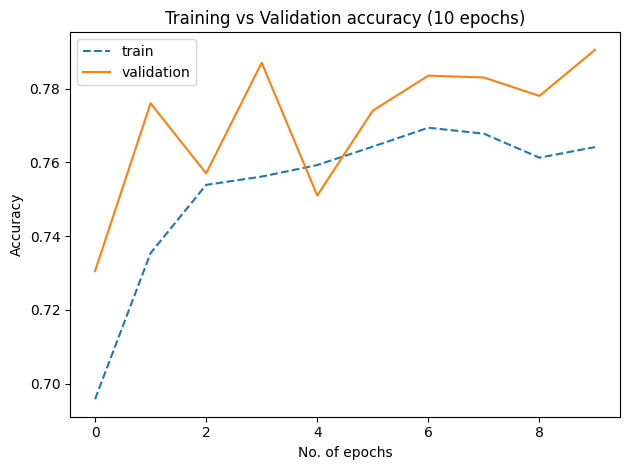

In [28]:
plt.plot(history_2.history['accuracy'],'--')
plt.plot(history_2.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.title("Training vs Validation accuracy (10 epochs)")
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig('xception_accuracy.png')

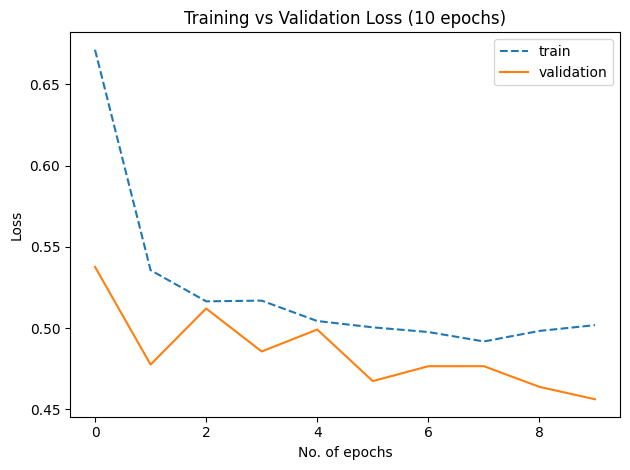

In [29]:
plt.plot(history_2.history['loss'],'--')
plt.plot(history_2.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper right')
plt.title("Training vs Validation Loss (10 epochs)")
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.savefig('xception_loss.png')